In [1]:
import GWDistancePipeline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
ss_calc = GWDistancePipeline.Standard_Siren_caclulator

# Data (Sample 1)

In [3]:
GW190521 = np.load('GW190521.npz')
GW190814 = np.load('GW190814.npz')
GW190412 = np.load('GW190412.npz')
GW190425 = np.load('GW190425.npz')
GW170817 = np.load('GW170817.npz')
GW170814 = np.load('GW170814.npz')
GW170608 = np.load('GW170608.npz')
GW170104 = np.load('GW170104.npz')
GW151226 = np.load('GW151226.npz')
GW150914 = np.load('GW150914.npz')

In [4]:
GW190521_strain_arr = GW190521['strain']
GW190814_strain_arr = GW190814['strain']
GW190412_strain_arr = GW190412['strain']
GW190425_strain_arr = GW190425['strain']
GW170817_strain_arr = GW170817['strain']
GW170814_strain_arr = GW170814['strain']
GW170608_strain_arr = GW170608['strain']
GW170104_strain_arr = GW170104['strain']
GW151226_strain_arr = GW151226['strain']
GW150914_strain_arr = GW150914['strain']

# Module Calibration Test

In [5]:
# Origional Data

# Input Arrays for best_distances
GW_name = ['GW190521', 'GW190814', 'GW190412', 'GW190425','GW170817 (kilanova)',  'GW170814', 
          'GW170608', 'GW170104', 'GW151226', 'GW150914']

ld = [5300, 241, 740, 159, 40, 600, 320, 990, 450, 440] # Mpc
ld_up_un = [2400, 41, 130, 69, 7, 150, 120, 440, 180, 150] # Mpc
ld_dn_un = [2600, 45, 160, 71, 15, 220, 110, 430, 190, 170] # Mpc

time = [32, 32, 32, 32, 32, 32, 32, 32, 32, 32] # s

mass = [150, 25.8, 38.4, 3.4, 2.8, 53.2, 17.8, 48.9, 20.5, 63.1] # M_sol
mass_up_err = [29,1, 3.8, 0.3, 0, 3.2, 3.4, 5.1, 6.4, 3.4] # M_sol
mass_dn_err = [17, 0.9, 3.9, 0.1, 0, 2.4, 0.7, 4.0, 1.5, 3.0] # M_sol

z_act = [0.82, 0.053, 0.15, 0.03, 0.01, 0.12, 0.07, 0.20, 0.09, 0.09] # kila nova has 0 error in z
z_up_err = [0.28, 0.009, 0.03, 0.01, 0, 0.03, 0.02, 0.08, 0.04, 0.03]
z_dn_err = [0.34, 0.010, 0.03, 0.02, 0, 0.04, 0.02, 0.08, 0.04, 0.03]

str_arr = [np.array(GW190521_strain_arr), np.array(GW190814_strain_arr), np.array(GW190412_strain_arr),
          np.array(GW190425_strain_arr), np.array(GW170817_strain_arr), np.array(GW170814_strain_arr),
           np.array(GW170608_strain_arr), np.array(GW170104_strain_arr), np.array(GW151226_strain_arr), 
           np.array(GW150914_strain_arr)]

strain_max = GWDistancePipeline.max_strain(str_arr)
strain_avg = GWDistancePipeline.avg_strain(str_arr)


ld_ulim = []
ld_llim = [] 

mass_ulim = []
mass_llim = []

z_ulim_act = []
z_llim_act = []

for i in np.arange(len(ld)):
    d_ulim = ld[i] + ld_up_un[i]
    d_llim = ld[i] - ld_dn_un[i]
    
    m_ulim = mass[i] + mass_up_err[i]
    m_llim = mass[i] - mass_dn_err[i]
    
    z_ulim = z_act[i] + z_up_err[i]
    z_llim = z_act[i] - z_dn_err[i]
    
    ld_ulim.append(d_ulim)
    ld_llim.append(d_llim)
    
    mass_ulim.append(m_ulim)
    mass_llim.append(m_llim)
    
    z_ulim_act.append(z_ulim)
    z_llim_act.append(z_llim)

In [6]:
#strain_max, strain_avg

In [7]:
d_new_dom, d_old, inc_old_val, d_new_val, inc_new_val, n_guess = ss_calc(ld, time, mass, strain_max, z_act, 
                                                                         GW_name, ld_up_un, z_up_err, 
                                                                         inc_tsting=True, prt=True)

Results for each GW
GW170817 (kilanova)
-------------------
z ≈ 0.01
n ≈ 9
D_guess ~ 39.966 ± 7.0 Mpc
i_guess ≈ 2.652 rad, 152.0°
H0_estimate ≈ 75.063 ± 0.205 km/s/Mpc

GW190425
-------------------
z ≈ 0.03
n ≈ 9
D_guess ~ 159.001 ± 69.0 Mpc
i_guess ≈ 3.054 rad, 175.0°
H0_estimate ≈ 56.603 ± 18.87 km/s/Mpc

GW170608
-------------------
z ≈ 0.07
n ≈ 3
D_guess ~ 320.145 ± 120.0 Mpc
i_guess ≈ 0.528 rad, 30.0°
H0_estimate ≈ 65.595 ± 19.082 km/s/Mpc

GW150914
-------------------
z ≈ 0.09
n ≈ 1
D_guess ~ 439.46 ± 150.0 Mpc
i_guess ≈ 1.225 rad, 70.0°
H0_estimate ≈ 61.439 ± 29.31 km/s/Mpc

GW151226
-------------------
z ≈ 0.09
n ≈ 3
D_guess ~ 450.039 ± 180.0 Mpc
i_guess ≈ 0.616 rad, 35.0°
H0_estimate ≈ 59.995 ± 26.94 km/s/Mpc

GW190521
-------------------
z ≈ 0.82
n ≈ 1
D_guess ~ 5294.293 ± 2400.0 Mpc
i_guess ≈ 0.892 rad, 51.0°
H0_estimate ≈ 46.465 ± 26.367 km/s/Mpc

--
 
Final Results
------------------------
H0 including GW170817: H0 ~ 75.056 ± 0.2048 km/s/Mpc
H0 excluding GW170817: H0 ~ 58.

# Inclination Angle

In [8]:
incs = np.linspace(0, np.pi, 500)  # inc domain 
d_old_dom = []

for x in np.arange(len(time)):
    d = []
    for i in np.arange(len(incs)):
        d.append(GWDistancePipeline.distance_to_GW(time[x], mass[x], strain_max[x],incs[i]))
    d_old_dom.append(d)

In [9]:
len(incs), len(d_old_dom[0])

(500, 500)

In [10]:
len(incs), len(d_old_dom[0]), len(d_new_dom[0]), len(d_old), len(inc_old_val), len(d_new_val),len(inc_new_val), len(n_guess), len(ld)

(500, 500, 500, 10, 10, 10, 10, 10, 10)

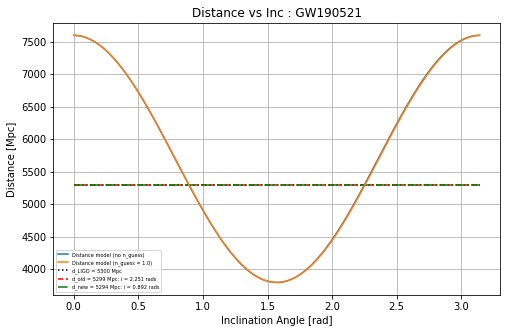

In [11]:
x = 0

plt.figure(figsize=(8,5))

plt.plot(incs, d_old_dom[x], label = 'Distance model (no n_guess)')
plt.plot(incs, d_new_dom[x], label = 'Distance model (n_guess = ' + str(n_guess[x]) + ')')
plt.hlines(ld[x], min(incs), max(incs), label = 'd_LIGO = '+ str(int(ld[x])) + ' Mpc', color = 'k', linestyle = ':')

plt.hlines(d_old[x], min(incs), max(incs), 
           label = 'd_old = ' + str(int(d_old[x])) + ' Mpc: i = ' + str(np.round(inc_old_val[x],3)) + ' rads'
           , color = 'r', linestyle = '--')
plt.hlines(d_new_val[x], min(incs), max(incs)
           , label = 'd_new = ' + str(int(d_new_val[x])) + ' Mpc: i = ' + str(np.round(inc_new_val[x],3)) + ' rads'
           , color = 'g', linestyle  = '-.')

plt.xlabel('Inclination Angle [rad]')
plt.ylabel('Distance [Mpc]')
plt.title('Distance vs Inc : ' + str(GW_name[x]))
plt.legend(fontsize=5)
plt.grid()
plt.show()

In [12]:
GW_name[x], inc_old_val[x], inc_new_val[x], n_guess[x]

('GW190521', 2.251, 0.892, 1.0)

In [13]:
dist = GWDistancePipeline.distance_to_GW(time[x], mass[x], strain_max[x],inc_new_val[x])
dist

5294.292888896507

In [14]:
mass_dom = np.linspace(mass_llim[x], mass_ulim[x], num = len(incs))

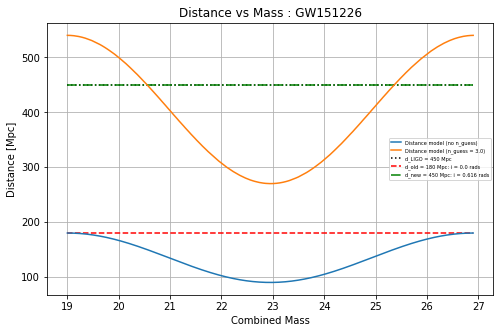

In [15]:
x = 8
mass_dom = np.linspace(mass_llim[x], mass_ulim[x], num = len(incs)) 

plt.figure(figsize=(8,5))

plt.plot(mass_dom, d_old_dom[x], label = 'Distance model (no n_guess)')
plt.plot(mass_dom, d_new_dom[x], label = 'Distance model (n_guess = ' + str(n_guess[x]) + ')')
plt.hlines(ld[x], min(mass_dom), max(mass_dom), label = 'd_LIGO = '+ str(int(ld[x])) + ' Mpc', color = 'k', linestyle = ':')

plt.hlines(d_old[x], min(mass_dom), max(mass_dom), 
           label = 'd_old = ' + str(int(d_old[x])) + ' Mpc: i = ' + str(np.round(inc_old_val[x],3)) + ' rads'
           , color = 'r', linestyle = '--')
plt.hlines(d_new_val[x], min(mass_dom), max(mass_dom)
           , label = 'd_new = ' + str(int(d_new_val[x])) + ' Mpc: i = ' + str(np.round(inc_new_val[x],3)) + ' rads'
           , color = 'g', linestyle  = '-.')


plt.xlabel('Combined Mass')
plt.ylabel('Distance [Mpc]')
plt.title('Distance vs Mass : ' + str(GW_name[x]))
plt.legend(fontsize=5)
plt.grid()
plt.show()

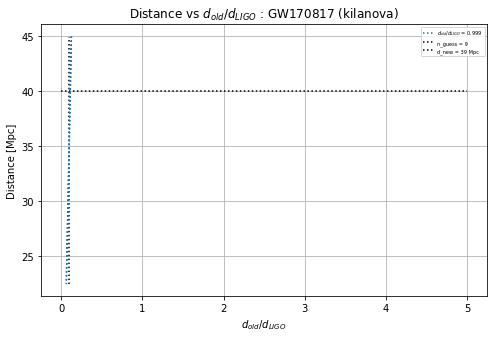

In [16]:
x = 4
n_dom = np.linspace(1,9, num = len(incs))

plt.figure(figsize=(8,5))

#plt.plot(np.array(d_old_dom[x])*100/ld[x], d_old_dom[x], label = 'Distance model (no n_guess)')
plt.plot(np.array(d_old_dom[x])/ld[x],d_new_dom[x]
         , label = '$d_{old}/d_{LIGO}$ = ' + str(np.round(np.array(d_new_val[x])/ld[x], 3)), linestyle = ':')
#plt.hlines(ld[x], min(n_dom), max(n_dom), label = 'd_LIGO = '+ str(int(ld[x])) + ' Mpc', color = 'k', linestyle = ':')

#plt.hlines(d_old[x], min(n_dom), max(n_dom), 
#           label = 'd_old = ' + str(int(d_old[x])) + ' Mpc: i = ' + str(np.round(inc_old_val[x],3)) + ' rads'
#           , color = 'r', linestyle = '--')
#plt.hlines(d_new_val[x], min(n_dom), max(n_dom)
#           , label = 'd_new = ' + str(int(d_new_val[x])) + ' Mpc: i = ' + str(np.round(inc_new_val[x],3)) + ' rads'
#           , color = 'g', linestyle  = '-.')

plt.vlines(n_guess[x]/100, min(d_new_dom[x]), max(d_new_dom[x]),linestyle = ':', label = 'n_guess = ' + str(n_guess[x]))

plt.hlines(d_new_val[x], 0, 5, label = 'd_new = '+ str(int(d_new_val[x])) + ' Mpc', color = 'k', linestyle = ':')


#plt.xscale('log')

plt.xlabel('$d_{old}/d_{LIGO}$')
plt.ylabel('Distance [Mpc]')
plt.title('Distance vs $d_{old}/d_{LIGO}$ : ' + str(GW_name[x]))
plt.legend(fontsize=5)
plt.grid()
plt.show()

In [17]:
np.mean(np.array(d_old_dom[x])/ld[x])*100

9.367734463979756

In [18]:
np.array(d_old_dom[x])/ld[x]

array([0.12481991, 0.12481744, 0.12481002, 0.12479765, 0.12478034,
       0.12475809, 0.1247309 , 0.12469878, 0.12466173, 0.12461976,
       0.12457287, 0.12452107, 0.12446437, 0.12440278, 0.12433632,
       0.12426498, 0.12418878, 0.12410773, 0.12402185, 0.12393115,
       0.12383564, 0.12373534, 0.12363026, 0.12352043, 0.12340585,
       0.12328656, 0.12316255, 0.12303387, 0.12290051, 0.12276252,
       0.1226199 , 0.12247269, 0.1223209 , 0.12216456, 0.12200369,
       0.12183832, 0.12166848, 0.12149419, 0.12131548, 0.12113237,
       0.12094491, 0.12075311, 0.12055701, 0.12035664, 0.12015202,
       0.1199432 , 0.11973021, 0.11951308, 0.11929184, 0.11906652,
       0.11883718, 0.11860383, 0.11836652, 0.11812529, 0.11788018,
       0.11763121, 0.11737844, 0.1171219 , 0.11686163, 0.11659768,
       0.11633008, 0.11605888, 0.11578413, 0.11550586, 0.11522412,
       0.11493895, 0.1146504 , 0.11435852, 0.11406334, 0.11376493,
       0.11346332, 0.11315856, 0.11285071, 0.11253981, 0.11222

In [19]:
# check redshift 

strain_max[x]

1.2427272842601703e-18